In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [123]:
fgmask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [125]:
q = np.load('test.npy')

In [147]:
np.random.permutation([[1,2],[3,4]])

array([[3, 4],
       [1, 2]])

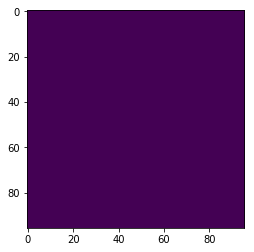

In [127]:
plt.imshow(backsub.apply(q))

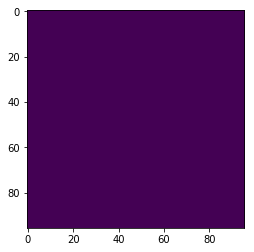

In [128]:
plt.imshow(backsub.apply(frame))

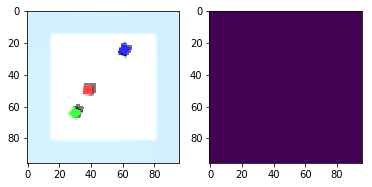

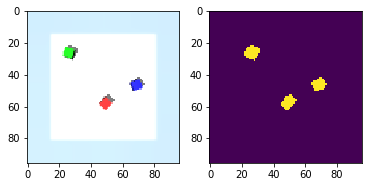

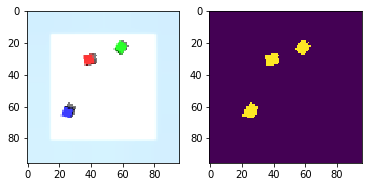

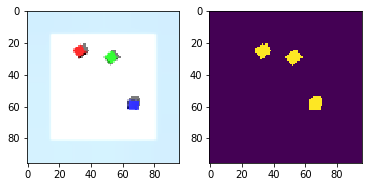

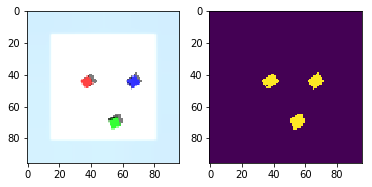

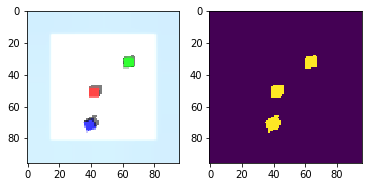

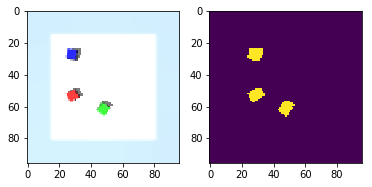

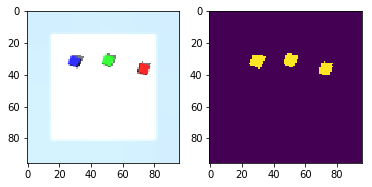

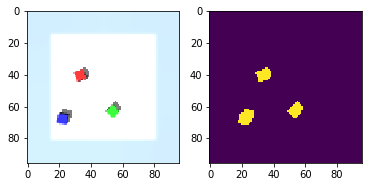

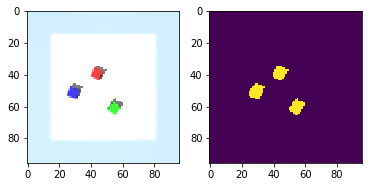

In [120]:
# history = 500
# varThreshold = 16
# detectShadows = True
backsub = cv2.createBackgroundSubtractorMOG2(detectShadows=False)

pad = 10
frames = (np.load('../dqn_image/scenes/rgb.npy') * 255).astype(np.uint8)
frames = np.pad(frames[:, pad:-pad, pad:-pad], [[0,0], [pad,pad], [pad,pad], [0,0]], 'edge')
for fid, frame in enumerate(frames):
    fgmask = backsub.apply(frame)
    if fid%50!=0:
        continue
    f, axes = plt.subplots(1, 2)
    axes[0].imshow(frame)
    axes[1].imshow(fgmask)
    plt.show()

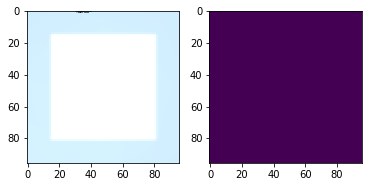

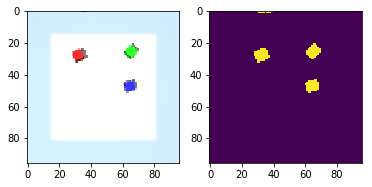

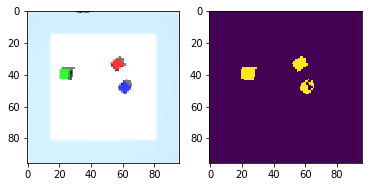

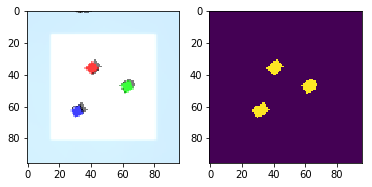

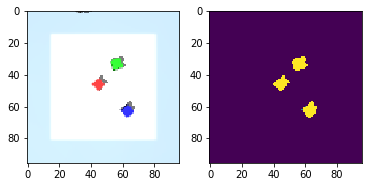

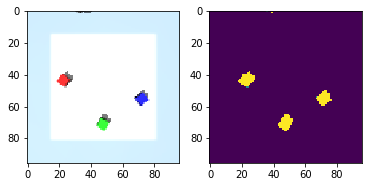

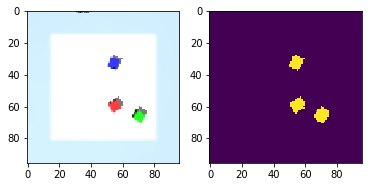

In [2]:
# history = 500
# varThreshold = 16
# detectShadows = True
backsub = cv2.createBackgroundSubtractorMOG2(detectShadows=False)

frame = (np.load('scenes/bg.npy') * 255).astype(np.uint8)
fgmask = backsub.apply(frame)
f, axes = plt.subplots(1, 2)
axes[0].imshow(frame)
axes[1].imshow(fgmask)
plt.show()

num_file = len([f for f in os.listdir('scenes') if 'rgb_' in f])
for fid in range(num_file):
    file_name = f'scenes/rgb_{fid}.npy'
    frame = (np.load(file_name) * 255).astype(np.uint8)
    fgmask = backsub.apply(frame)
    if fid%50!=0:
        continue
    f, axes = plt.subplots(1, 2)
    axes[0].imshow(frame)
    axes[1].imshow(fgmask)
    plt.show()

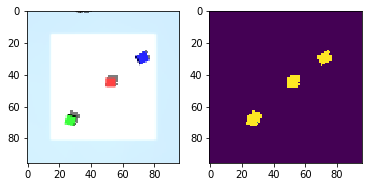

In [3]:
mask = backsub.apply(frame)
f, axes = plt.subplots(1, 2)
axes[0].imshow(frame)
axes[1].imshow(fgmask)

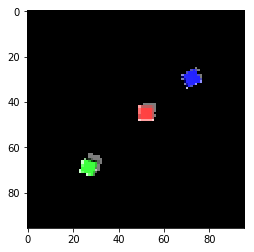

In [4]:
frame_masked = np.zeros_like(frame)
frame_masked[mask.astype(bool)] = frame[mask.astype(bool)]
plt.imshow(frame_masked)

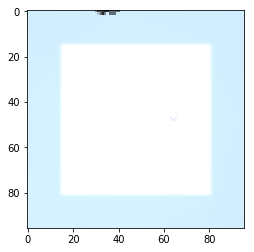

In [7]:
backsub.getBackgroundImage(frame)
plt.imshow(frame)

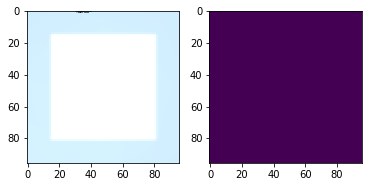

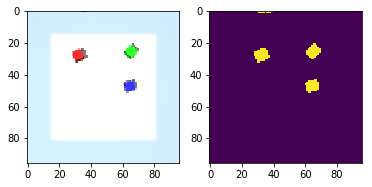

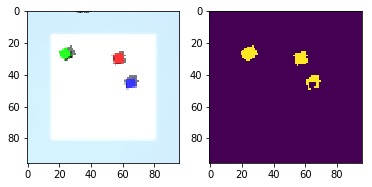

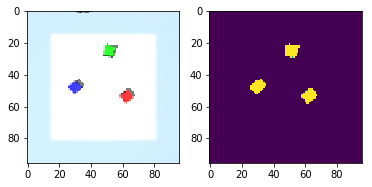

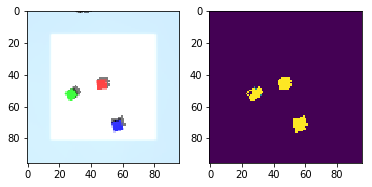

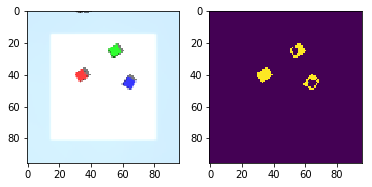

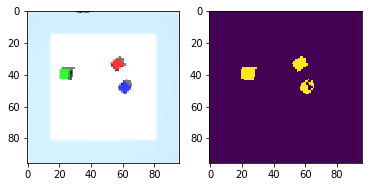

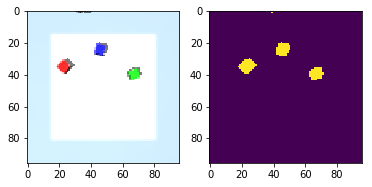

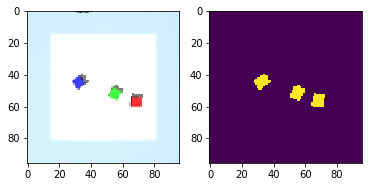

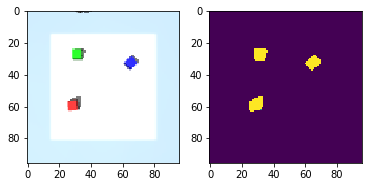

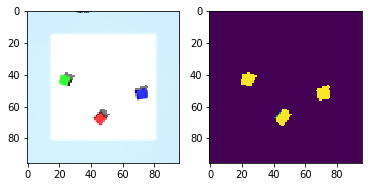

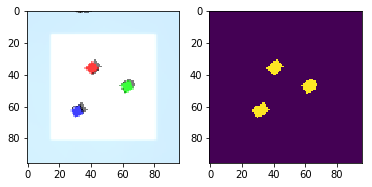

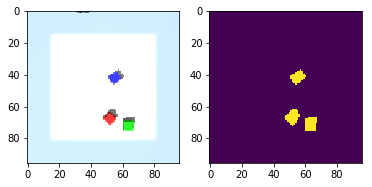

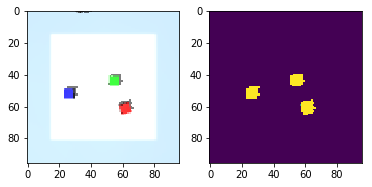

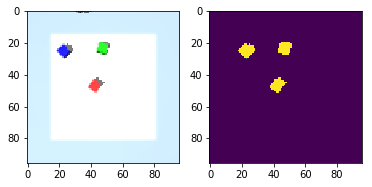

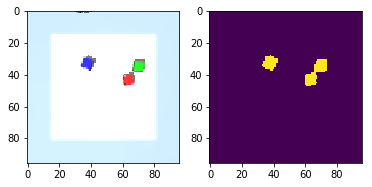

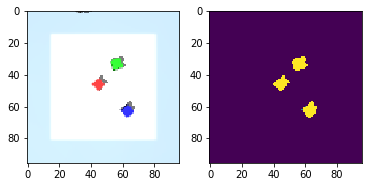

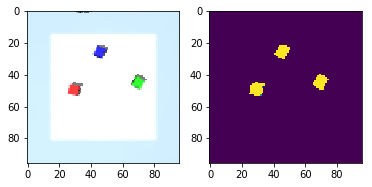

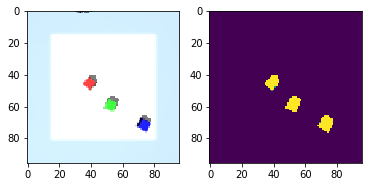

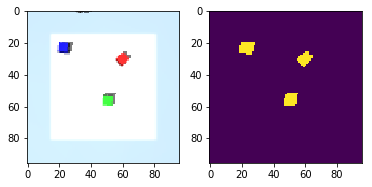

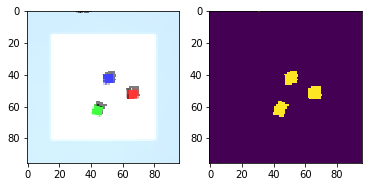

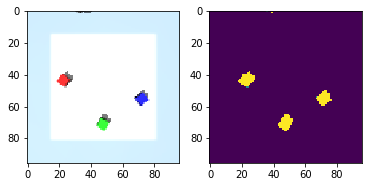

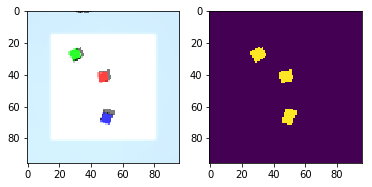

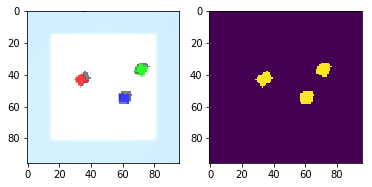

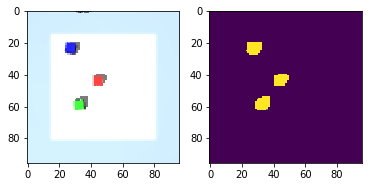

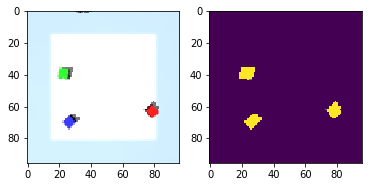

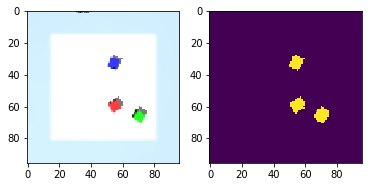

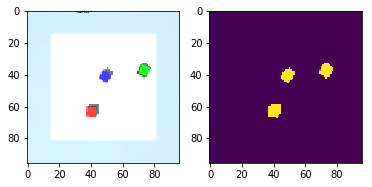

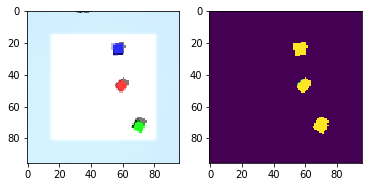

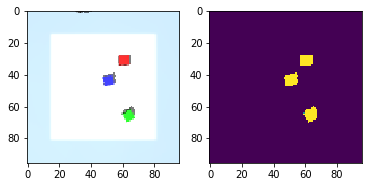

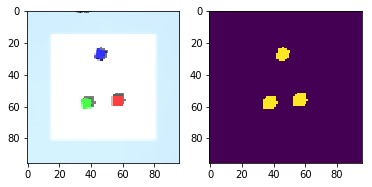

In [5]:
# history = 500
# varThreshold = 16
# detectShadows = True
backsub = cv2.createBackgroundSubtractorMOG2(detectShadows=True)

frame = (np.load('scenes/bg.npy') * 255).astype(np.uint8)
fgmask = backsub.apply(frame)
f, axes = plt.subplots(1, 2)
axes[0].imshow(frame)
axes[1].imshow(fgmask)
plt.show()

num_file = len([f for f in os.listdir('scenes') if 'rgb_' in f])
for fid in range(num_file):
    file_name = f'scenes/rgb_{fid}.npy'
    frame = (np.load(file_name) * 255).astype(np.uint8)
    fgmask = backsub.apply(frame)
    if fid%10!=0:
        continue
    f, axes = plt.subplots(1, 2)
    axes[0].imshow(frame)
    axes[1].imshow(fgmask)
    plt.show()

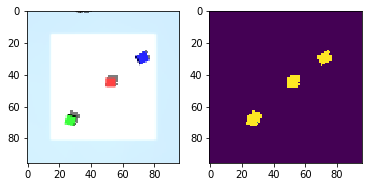

In [89]:
mask = backsub.apply(frame)
f, axes = plt.subplots(1, 2)
axes[0].imshow(frame)
axes[1].imshow(fgmask)

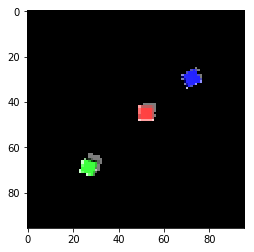

In [14]:
frame_masked = np.zeros_like(frame)
frame_masked[mask.astype(bool)] = frame[mask.astype(bool)]
plt.imshow(frame_masked)

In [8]:
from copy import deepcopy

In [87]:
contours = cv2.findContours(deepcopy(mask), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [20]:
contours[1]

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [-1,  1, -1, -1]]], dtype=int32)

In [33]:
contours[0][0][0]

array([[27, 63]], dtype=int32)

In [34]:
contours[0][0][0:2]

array([[[27, 63]],

       [[27, 64]]], dtype=int32)

In [35]:
contours[0][0].shape

(27, 1, 2)

In [37]:
pixels_obj1.shape

array([[27, 63],
       [27, 64],
       [26, 65],
       [25, 65],
       [24, 66],
       [24, 67],
       [24, 68],
       [24, 69],
       [23, 70],
       [23, 71],
       [24, 71],
       [25, 71],
       [26, 72],
       [27, 72],
       [28, 72],
       [29, 72],
       [30, 71],
       [31, 70],
       [31, 69],
       [31, 68],
       [32, 67],
       [32, 66],
       [32, 65],
       [31, 64],
       [30, 64],
       [29, 64],
       [28, 63]], dtype=int32)

In [39]:
zeros[pixels_obj1].shape

(27, 2, 96, 3)

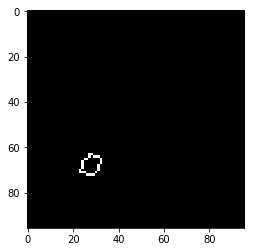

In [43]:
zeros = np.zeros_like(frame)
pixels_obj1 = contours[0][0].reshape(-1, 2)
for px, py in pixels_obj1:
    zeros[py, px] = [1,1,1]
plt.imshow(zeros*255)

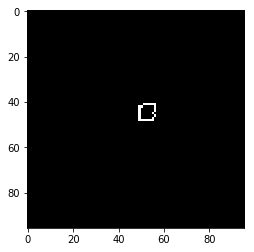

In [44]:
zeros = np.zeros_like(frame)
pixels_obj2 = contours[0][1].reshape(-1, 2)
for px, py in pixels_obj2:
    zeros[py, px] = [1,1,1]
plt.imshow(zeros*255)

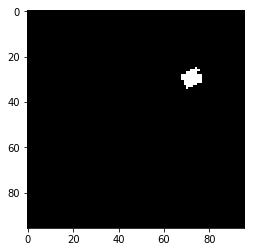

In [69]:
zeros = np.zeros_like(frame)
im_contour = cv2.drawContours(zeros, contours[0], 2, (255, 255, 255), -1)
plt.imshow(im_contour)

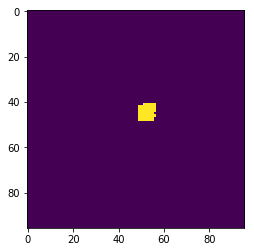

In [106]:
zeros = np.zeros_like(mask)
im_contour = cv2.drawContours(zeros, contours[0], 1, 1, -1)
plt.imshow(im_contour)

In [116]:
frame[im_contour.astype(bool)].mean(0)/255

array([0.8594882 , 0.38770356, 0.38770356])

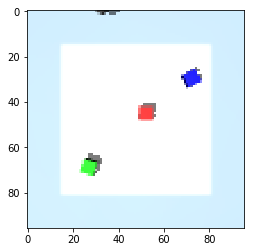

In [117]:
plt.imshow(frame)

In [77]:
im_contour.shape

(96, 96)

In [78]:
im_contour.max()

1

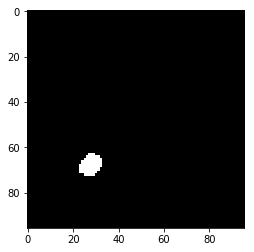

In [65]:
convexhull = cv2.convexHull(contours[0][0])
zeros = np.zeros_like(frame)
im_convex = cv2.drawContours(zeros, [convexhull], 0, (255, 255, 255), -1)
plt.imshow(im_convex)

In [58]:
cv2.find

array([[32, 67]], dtype=int32)

In [80]:
import pickle

In [82]:
with open('backsub.pkl', 'wb') as f:
    pickle.dump(backsub, f)

TypeError: can't pickle cv2.BackgroundSubtractorMOG2 objects